In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import interpolate

In [2]:
import Physical_Const as phys
h=phys.h 
c=phys.c
G=phys.G
Msun=phys.Msun
mn=phys.mn # Neutron mass


Sigma=mn**4.0*c**3.0/(8.0*np.pi**2*(h/(2.0*np.pi))**3.0) #Dimensions of energy density
b=c/np.sqrt(Sigma*G) # Dimensions of radius
mdim=b*c**2.0/G # Dimensions of mass
pdim=Sigma*c**2 # Dimensions of pressure

In [3]:
rhoNL3,PNL3=np.loadtxt('EOS/EOSFull_NL3_BPS02.dat',usecols=(0,1),unpack=True)
P_NL3=interpolate.interp1d(rhoNL3/Sigma,PNL3/pdim)
rho_NL3=interpolate.interp1d(PNL3/pdim,rhoNL3/Sigma)

rhoSLy,PSLy=np.loadtxt('EOS/sly.dat',usecols=(2,1),unpack=True)
P_SLy=interpolate.interp1d(rhoSLy/Sigma,(PSLy*c**2)/pdim)
rho_SLy=interpolate.interp1d((PSLy*c**2)/pdim,rhoSLy/Sigma)

rhoBSK19,PBSK19=np.loadtxt('EOS/bsk19.dat',usecols=(1,2),unpack=True)
P_BSK19=interpolate.interp1d(rhoBSK19/Sigma,(PBSK19*c**2)/pdim)
rho_BSK19=interpolate.interp1d((PBSK19*c**2)/pdim,rhoBSK19/Sigma)

rhoBSK20,PBSK20=np.loadtxt('EOS/bsk20.dat',usecols=(1,2),unpack=True)
P_BSK20=interpolate.interp1d(rhoBSK20/Sigma,(PBSK20*c**2)/pdim)
rho_BSK20=interpolate.interp1d((PBSK20*c**2)/pdim,rhoBSK20/Sigma)

rhoALF1,PALF1=np.loadtxt('EOS/alf1.dat',usecols=(2,1),unpack=True)
P_ALF1=interpolate.interp1d(rhoALF1/Sigma,(PALF1*c**2)/pdim)
rho_ALF1=interpolate.interp1d((PALF1*c**2)/pdim,rhoALF1/Sigma)

rhoH1,PH1=np.loadtxt('EOS/H1.dat',usecols=(2,1),unpack=True)
P_H1=interpolate.interp1d(rhoH1/Sigma,(PH1*c**2)/pdim)
rho_H1=interpolate.interp1d((PH1*c**2)/pdim,rhoH1/Sigma)

rhoSQM1,PSQM1=np.loadtxt('EOS/sqm1.dat',usecols=(2,1),unpack=True)
P_SQM1=interpolate.interp1d(rhoSQM1/Sigma,(PSQM1*c**2)/pdim)
rho_SQM1=interpolate.interp1d((PSQM1*c**2)/pdim,rhoSQM1/Sigma)

rhoSQM2,PSQM2=np.loadtxt('EOS/sqm2.dat',usecols=(2,1),unpack=True)
P_SQM2=interpolate.interp1d(rhoSQM2/Sigma,(PSQM2*c**2)/pdim)
rho_SQM2=interpolate.interp1d((PSQM2*c**2)/pdim,rhoSQM2/Sigma)

In [4]:
rhoNL3[0]

7.8

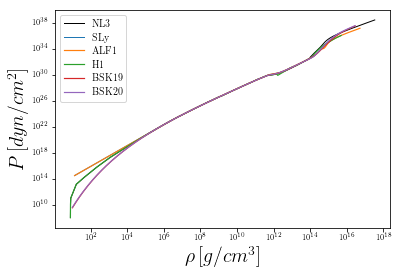

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.loglog(rhoNL3,P_NL3(rhoNL3/Sigma)*pdim,'k-', \
           linewidth=1,label="NL3") # Interpolación
#plt.loglog(rhoNL3,PNL3,'o', \
 #          markersize=0.5) # Valores de la tabla

plt.loglog(rhoSLy,P_SLy(rhoSLy/Sigma)*pdim,'-', \
           linewidth=1,label="SLy") 
#plt.loglog(rhoSLy,PSLy*c**2,'o', \
  #         markersize=0.5) 

plt.loglog(rhoALF1,P_ALF1(rhoALF1/Sigma)*pdim,'-', \
           linewidth=1.2,label="ALF1") 
#plt.loglog(rhoALF1,PALF1*c**2,'o', \
#           markersize=.5) 

plt.loglog(rhoH1,P_H1(rhoH1/Sigma)*pdim,'-', \
           linewidth=1.2,label="H1") 
#plt.loglog(rhoH1,PH1*c**2,'o', \
 #          markersize=.5) 


plt.loglog(rhoBSK19,P_BSK19(rhoBSK19/Sigma)*pdim,'-', \
           linewidth=1.2,label="BSK19") 
#plt.loglog(rhoBSK19,PBSK19*c**2,'o', \
 #          markersize=.5) # Valores de la tabla

plt.loglog(rhoBSK20,P_BSK20(rhoBSK20/Sigma)*pdim,'-', \
           linewidth=1.2,label="BSK20") 
#plt.loglog(rhoBSK20,PBSK20*c**2,'o', \
 #          markersize=.5) # Valores de la tabla

#-------------Strange Quark Matter (Don't know how they work)
    
#plt.loglog(rhoSQM1,P_SQM1(rhoSQM1/Sigma)*pdim,'-', \
 #          linewidth=1.2,label="SQM1") 
#plt.loglog(rhoBSK20,PBSK20*c**2,'o', \
 #          markersize=.5) # Valores de la tabla
    
#plt.loglog(rhoSQM2,P_SQM2(rhoSQM2/Sigma)*pdim,'-', \
 #          linewidth=1.2,label="SQM2") 
#plt.loglog(rhoBSK20,PBSK20*c**2,'o', \
 #          markersize=.5) # Valores de la tabla    
    
plt.xlabel(r'$\rho\,[g/cm^3]$')
plt.ylabel(r'$P\,[dyn/cm^{2}]$')
plt.legend()
plt.savefig('figures/EOSs1.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()

In [6]:
def RK4Step(f, r, y, dr):
    k1,l1 = f(r,y)
    
    k2,l2 = f(r+0.5*dr,[y[0]+0.5*dr*k1,y[1]+0.5*dr*l1])   
    
    k3,l3 = f(r+0.5*dr,[y[0]+0.5*dr*k2,y[1]+0.5*dr*l2])
    
    k4,l4 = f(r+dr,[y[0]+dr*k3,y[1]+dr*l3])
    
    k=(dr/6)*(k1+2.0*k2+2.0*k3+k4)
    l=(dr/6)*(l1+2.0*l2+2.0*l3+l4)
    return [y[0]+k,y[1]+l]

In [7]:
def stepsize(m,P,ds,delta):
    return delta*((1/m)*ds[0]-(1/P)*ds[1])**(-1)

In [8]:
def staticMR(y0,r0,dr0,rhoEoS):
    def TOV(r,y):
        mns, pns = y
        #print('P=',pns)
        dmdr=4.0*np.pi*r**2.0*rhoEoS(pns) #f(P)
        dpdr=-((4.0*np.pi*r**3.0*pns+mns)*(pns+rhoEoS(pns)))/(r*(r-2.0*mns)) #g(P,m)
        return [dmdr,dpdr]

    y=RK4Step(TOV,r0,[y0[0],y0[1]],dr0) #first step taken arbitrary (dr0) (for now)
    r=r0+dr0
    while rhoEoS(y[1])*Sigma > 2e+1 and y[1] > 0.0:
       # print('P=',y[1],'rho=',rho_EoS(y[1])*Sigma)
        dr=stepsize(y[0],y[1],TOV(r,[y[0],y[1]]),delta)
        y=RK4Step(TOV,r,[y[0],y[1]],dr)
        r=r+dr
    return [y[0]*mdim/Msun,r*b*1e-5,rhoEoS(y0[1])*Sigma] 

In [9]:
def MRrho(m0,r0,dr0,rhosc,rhoEoS,PEoS):
    psc=PEoS(rhosc/Sigma) #Range of central pressures
    MM=[];RR=[];rhorho=[]

    for pc in psc:
        MRrho=staticMR([m0,pc],r0,dr0,rhoEoS)
       # print(MRrho)
        RR=RR+[MRrho[1]]
        MM=MM+[MRrho[0]]
        rhorho=rhorho+[MRrho[2]]
        
    return [RR,MM,rhorho]

In [10]:
#Range of central densities
n=np.arange(14.4,15.61,0.02)
rhosc=10.0**n 

#Initial values
dr0=1e-8 # Step size
r0=dr0 # Initial point
m0=0 
delta=0.1

In [11]:
MRALF1=MRrho(m0,r0,dr0,rhosc,rho_ALF1,P_ALF1)
MRSLy=MRrho(m0,r0,dr0,rhosc,rho_SLy,P_SLy)
MRNL3=MRrho(m0,r0,dr0,rhosc,rho_NL3,P_NL3)
MRH1=MRrho(m0,r0,dr0,rhosc,rho_H1,P_H1)
MRBSK19=MRrho(m0,r0,dr0,rhosc,rho_BSK19,P_BSK19)
MRBSK20=MRrho(m0,r0,dr0,rhosc,rho_BSK20,P_BSK20)


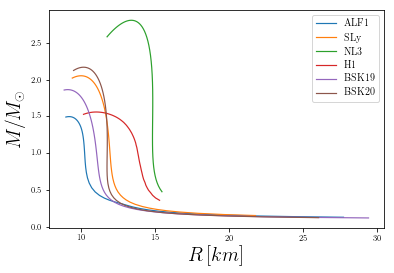

In [12]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(MRALF1[0], MRALF1[1],'-', linewidth=1.2,label='ALF1')
plt.plot(MRSLy[0], MRSLy[1],'-', linewidth=1.2,label='SLy')
plt.plot(MRNL3[0], MRNL3[1],'-', linewidth=1.2,label='NL3')
plt.plot(MRH1[0], MRH1[1],'-', linewidth=1.2,label='H1')
plt.plot(MRBSK19[0], MRBSK19[1],'-', linewidth=1.2,label='BSK19')
plt.plot(MRBSK20[0], MRBSK20[1],'-', linewidth=1.2,label='BSK20')

plt.xlabel(r'$R\,[km]$')
plt.ylabel(r'$M/M_{\odot}$')
plt.legend()
plt.savefig('figures/MRrels.pdf', format='pdf', dpi=1000,bbox_inches="tight")
plt.show()
plt.clf()